In [1]:
from exact_concorde.exact_concorde import *
import os
os.environ["QSOPT_DIR"] = os.path.abspath("../pyconcorde/data/")

[WARNING] CuPy not found. Falling back to NumPy.


100%|█████████▉| 1297/1298 [00:00<00:00, 465037.81it/s]


Problem Name: Pseudo_TSP_Instance
Problem Type: TSP
Number of Nodes: 1291
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 63271
   0 Steps   Best: 55017   0.00 seconds
   5 Steps   Best: 54943   0.01 seconds
   7 Steps   Best: 54922   0.01 seconds
  12 Steps   Best: 53659   0.01 seconds
  15 Steps   Best: 53636   0.01 seconds
  20 Steps   Best: 53403   0.01 seconds
  26 Steps   Best: 53380   0.01 seconds
  33 Steps   Best: 53378   0.01 seconds
  44 Steps   Best: 52069   0.01 seconds
  58 Steps   Best: 52056   0.01 seconds
  63 Steps   Best: 52051   0.01 seconds
  67 Steps   Best: 52002   0.01 seconds
  77 Steps   Best: 51986   0.02 seconds
  79 Steps   Best: 51971   0.02 seconds
  94 Steps   Best: 51934   0.02 seconds
 103 Steps   Best: 51923   0.02 seconds
 106 Steps   Best: 51891   0.02 seconds
 116 Steps   Best: 51848   0.02 seconds
 130 Steps   Best: 51639   0.02 seconds
 155 Steps   Best: 51636   0.02 se

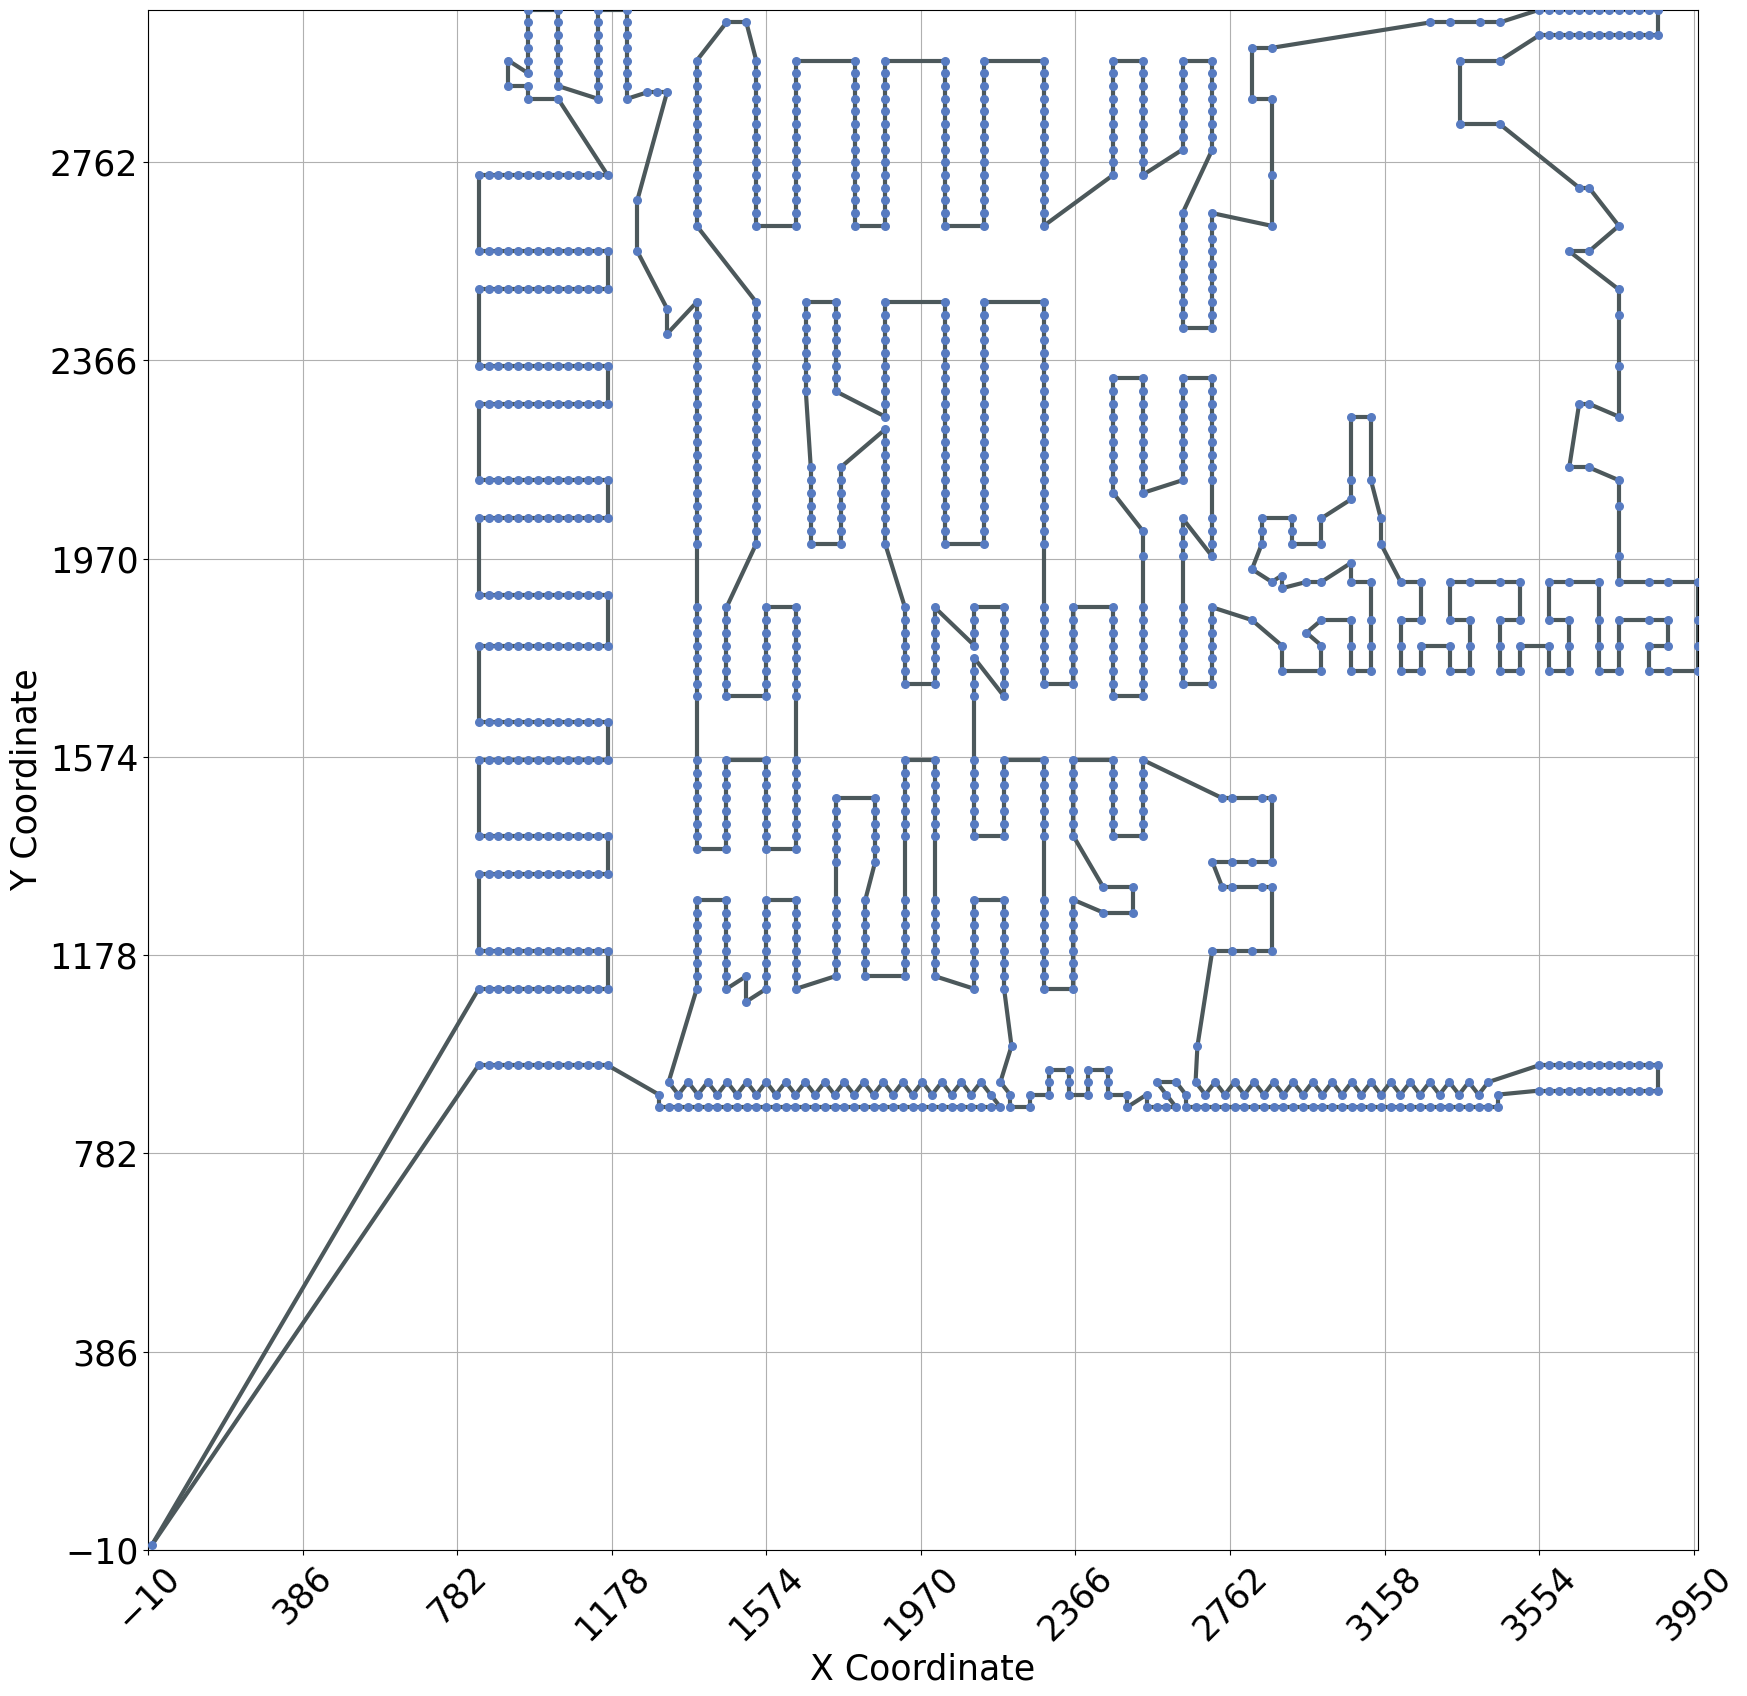

In [3]:
file_parser = FileParser()
solution_plotter = SolutionPlot()

fname = './instances/tsplib/d1291.tsp'
# fname = './instances/tsplib/a280.tsp'

instance_info = file_parser.parse_instance_from_file(fname)
coordinates = instance_info['COORDINATES']
distance_mat = np.array(instance_info['COST_MATRIX'])
nodes = {i: (x, y) for i, (x, y) in enumerate(coordinates)}
tsp_instance = TravelingSalesmenProblem(node_coords_dict=nodes)

concorde_model = Concorde(nodes=list(nodes.keys()), coordinates=coordinates)
concorde_model.optimize(timelimit=30, verbose=False)

current_route = concorde_model.get_tsp_route()
current_obj = concorde_model.get_objective_value()

X_MIN, X_MAX, Y_MIN, Y_MAX, GRID_RES = determine_instance_boundary(coordinates)

tsp_plot = solution_plotter.plot_tsp_solution(current_route, tsp_instance.coords,
                                                        x_min=X_MIN, x_max=X_MAX,
                                                        y_min=Y_MIN, y_max=Y_MAX,
                                                        grid_resolution=(X_MAX - X_MIN)//10)

In [9]:
concorde_model.get_objective_value()

2579.0

In [21]:
# calculate the optimal bound from opt
# the calculation is based on integer
# file_parser = FileParser()
opt_tour = open("instances/tsplib/a280.opt.tour").readlines()[4:]
opt_tour = [x.strip() for x in opt_tour]
node_coords = open("instances/tsplib/a280.tsp").readlines()[6:-1]
node_coords = [x.strip().replace("   ", " ").replace("  ", " ").split(" ") for x in node_coords]
node_coords = {x[0]: np.array([int(x[1]), int(x[2])]) for x in node_coords}

total_dist = 0
for i in range(len(opt_tour) - 2):
    node1 = node_coords[opt_tour[i]]
    node2 = node_coords[opt_tour[i+1]]
    total_dist += np.floor(np.linalg.norm(node1 - node2) + 0.5)
total_dist += np.floor(np.linalg.norm(node_coords[opt_tour[0]] - node_coords[opt_tour[-2]]) + 0.5)
print("optimal travel distance:", total_dist)

optimal travel distance: 2579.0


In [4]:
# test concord
from concorde.tsp import TSPSolver
from concorde.tests.data_utils import get_dataset_path
fname = get_dataset_path("berlin52")
solver = TSPSolver.from_tspfile(fname)
# Problem Name: berlin52
# Problem Type: TSP
# 52 locations in Berlin (Groetschel)
# Number of Nodes: 52
# Rounded Euclidean Norm (CC_EUCLIDEAN)

Problem Name: berlin52
Problem Type: TSP
52 locations in Berlin (Groetschel)
Number of Nodes: 52
Rounded Euclidean Norm (CC_EUCLIDEAN)


In [5]:
solution = solver.solve()


CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 9951
   0 Steps   Best: 7565   0.00 seconds
   1 Steps   Best: 7542   0.00 seconds
  26 Total Steps.
Best cycle length: 7542
Lin-Kernighan Running Time: 0.01
LK Initial Run: 7542.0
LK Run 0: 7542.0
LK Run from best tour: 7542.0
Time to find compression tour: 0.02 (seconds)
Set initial upperbound to 7542 (from tour)
Fractional Matching: 7197.0
Initial Running Time: 0.00 (seconds)
Basis Running Time: 0.00 (seconds)
Total fractional matching time: 0.00 (seconds)
Total Time for first_lp: 0.00 (seconds)
Setting upperbound to the initial bound: 7542.00
Loading lp...done in 0.00 seconds
LP has:  52 rows  70 columns  140 nonzeros
Dual opt returned after 0.00 seconds
Initial LP value: 7197.000000
Setting tolerances: next cuts 3.4500 next round 0.3450
CCtsp_init_edgegenerator (50)
 1325 edges
LP has:  52 rows  70 columns  140 nonzeros
Loading lp...done in 0.00 seconds
LP has:  52 rows  70 columns  140 nonzero

100%|█████████▉| 1006/1007 [00:00<00:00, 591459.18it/s]


Problem Name: Pseudo_TSP_Instance
Problem Type: TSP
Number of Nodes: 1000
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 21705718
   0 Steps   Best: 19479513   0.00 seconds
   2 Steps   Best: 19244847   0.01 seconds
   4 Steps   Best: 19229870   0.01 seconds
   6 Steps   Best: 18992545   0.01 seconds
   8 Steps   Best: 18989225   0.01 seconds
   9 Steps   Best: 18986030   0.01 seconds
  12 Steps   Best: 18980394   0.01 seconds
  13 Steps   Best: 18972955   0.01 seconds
  14 Steps   Best: 18965171   0.01 seconds
  15 Steps   Best: 18951516   0.01 seconds
  20 Steps   Best: 18943394   0.01 seconds
  30 Steps   Best: 18935909   0.02 seconds
  41 Steps   Best: 18933305   0.02 seconds
  48 Steps   Best: 18920338   0.02 seconds
  53 Steps   Best: 18919767   0.02 seconds
  55 Steps   Best: 18915117   0.03 seconds
  56 Steps   Best: 18908976   0.03 seconds
  59 Steps   Best: 18895029   0.03 seconds
  66 Steps   Best

need to link an lp solver to use this function
CClp_getweight failed
find_candidate_cliques failed
need to link an lp solver to use this function
CClp_getweight failed
find_candidate_cliques failed
need to link an lp solver to use this function
CClp_getweight failed
find_candidate_cliques failed
need to link an lp solver to use this function
CClp_getweight failed
find_candidate_cliques failed
need to link an lp solver to use this function
CClp_getweight failed
find_candidate_cliques failed
need to link an lp solver to use this function
CClp_getweight failed
find_candidate_cliques failed


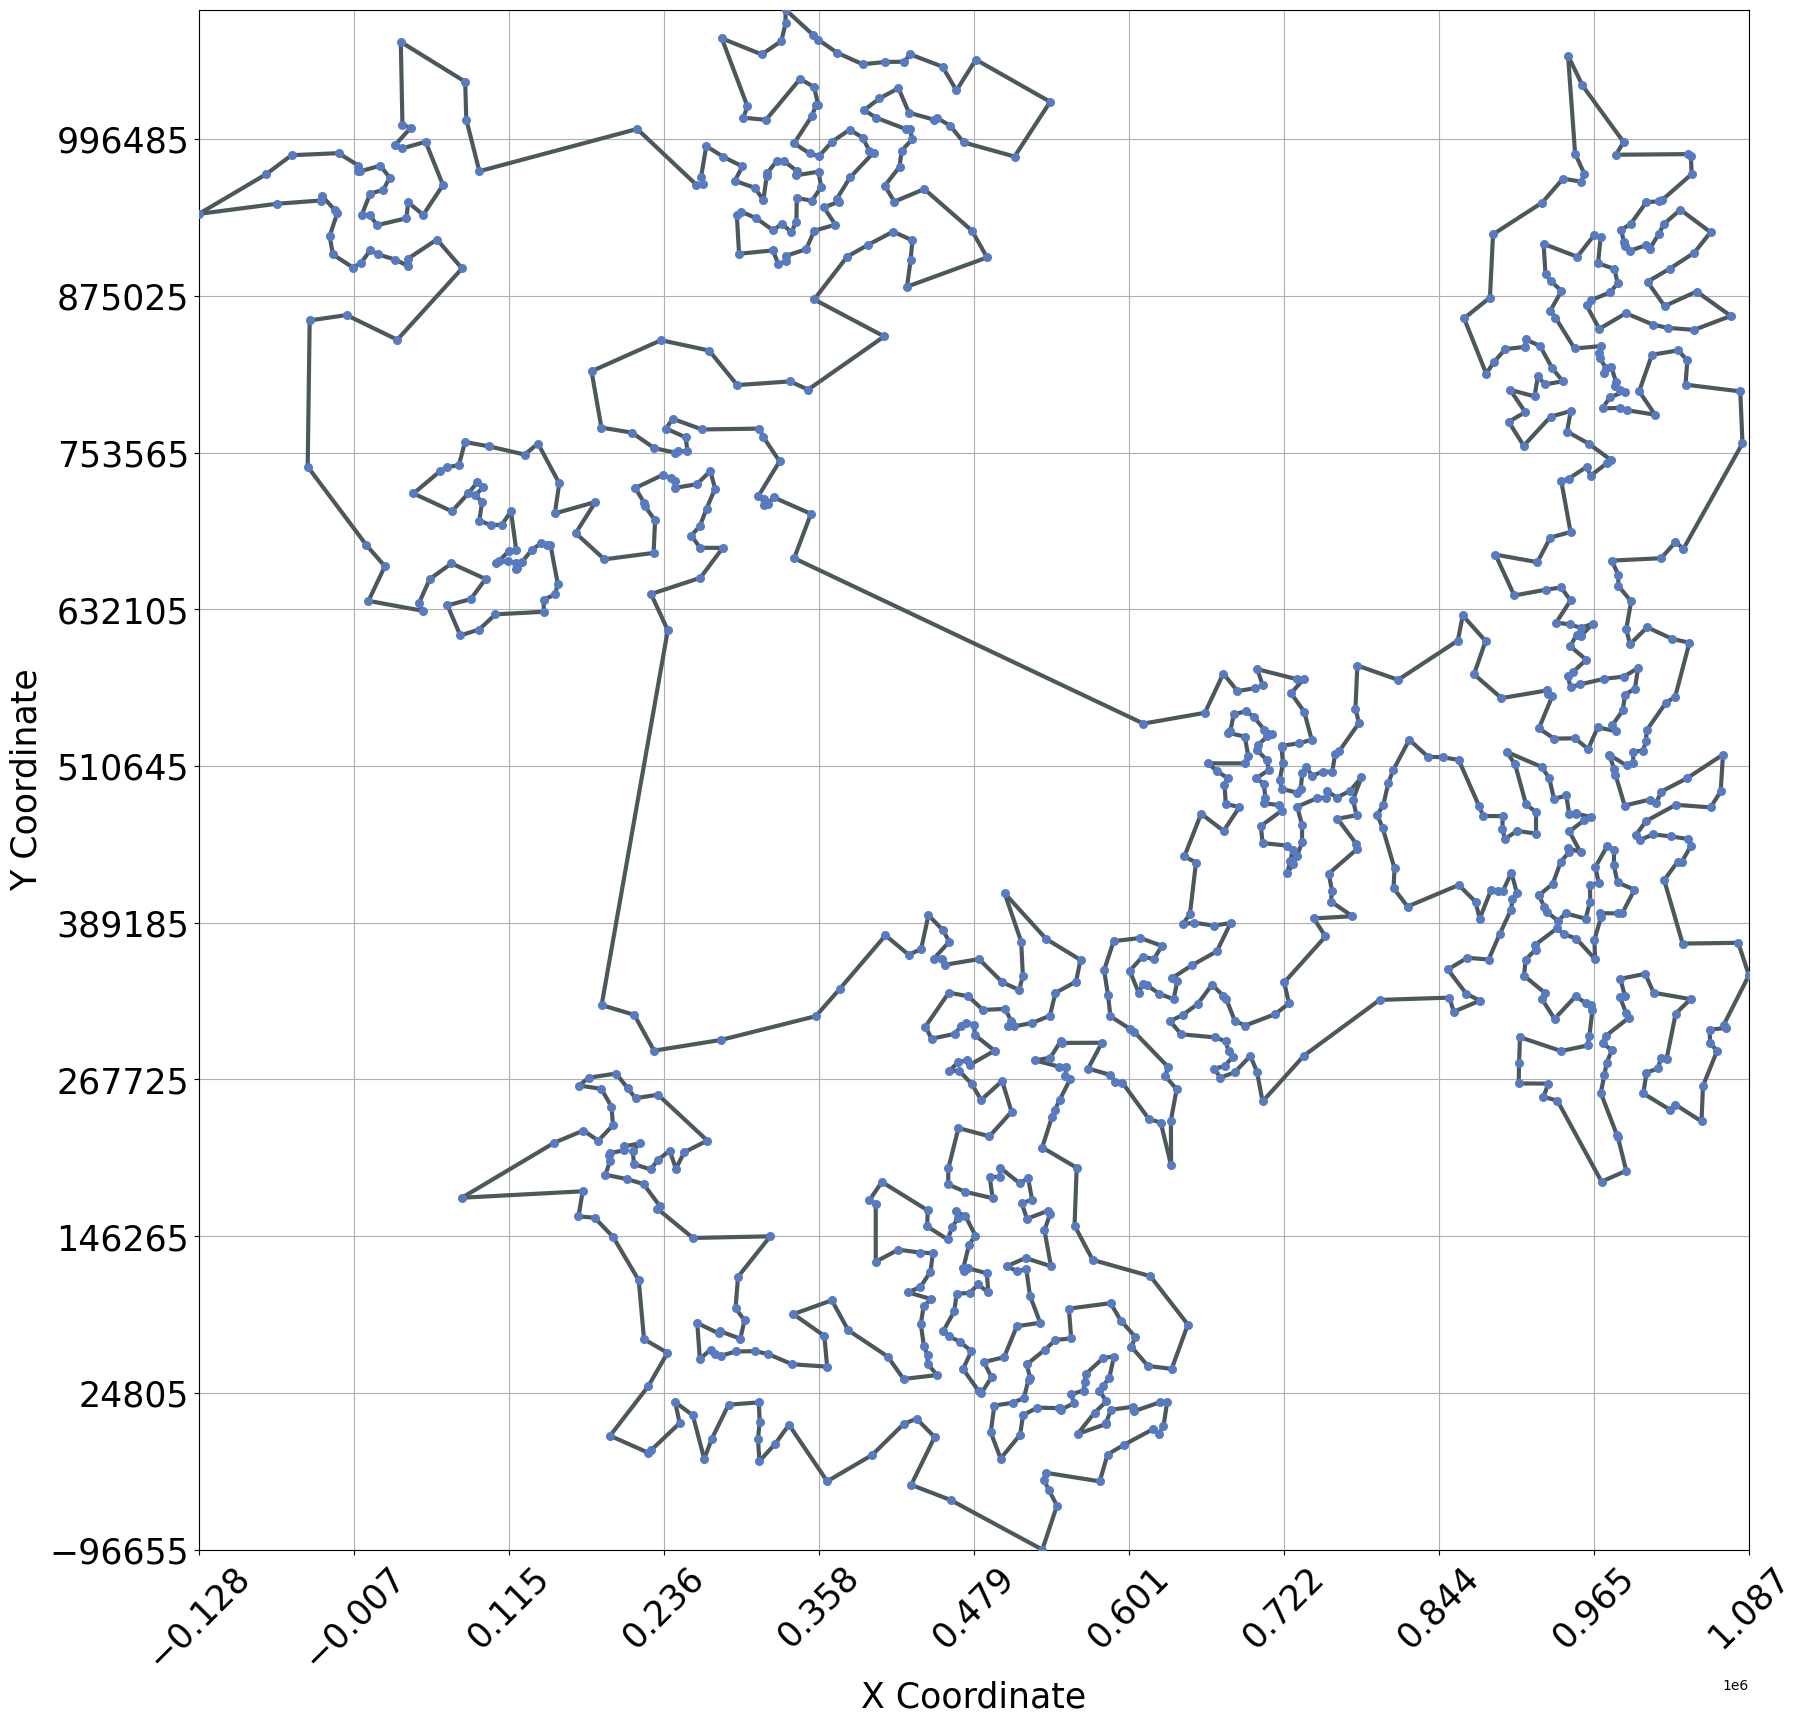

In [22]:
file_parser = FileParser()
solution_plotter = SolutionPlot()

task = 'dsj1000'
fname = f'./instances/tsplib/{task}.tsp'
# fname = './instances/tsplib/a280.tsp'

instance_info = file_parser.parse_instance_from_file(fname)
coordinates = instance_info['COORDINATES']
distance_mat = np.array(instance_info['COST_MATRIX'])
nodes = {i: (x, y) for i, (x, y) in enumerate(coordinates)}
tsp_instance = TravelingSalesmenProblem(node_coords_dict=nodes)

concorde_model = Concorde(nodes=list(nodes.keys()), coordinates=coordinates)
concorde_model.optimize(timelimit=10000, verbose=False)
current_route = concorde_model.get_tsp_route()
current_obj = concorde_model.get_objective_value()

X_MIN, X_MAX, Y_MIN, Y_MAX, GRID_RES = determine_instance_boundary(coordinates)

tsp_plot = solution_plotter.plot_tsp_solution(current_route, tsp_instance.coords,
                                                        x_min=X_MIN, x_max=X_MAX,
                                                        y_min=Y_MIN, y_max=Y_MAX,
                                                        grid_resolution=(X_MAX - X_MIN)//10)

In [23]:
# calculate optimality gap
def cal_opt_gap(model_route_dist, taskname):
    opt = int(open('./instances/opt/{}.opt.tour.txt'.format(taskname)).readlines()[-1].strip())
    return (model_route_dist - opt) / opt

In [25]:
cal_opt_gap(concorde_model.get_objective_value(), task)

-2.6795014069525987e-05